### Code description
Generate graphs based on training results for comparative analysis

In [1]:
 
import pickle
import joblib   
with open('./bgp/simglucose/params/iob.pkl', 'rb') as file:
    data = pickle.load(file)
    print(data)

data = joblib.load('./saves/bb_adult#004_seed0.pkl')
print(data)



{'child#001': [1.0, 0.9922446011331351, 0.9713532982014699, 0.9404420297232104, 0.9021007284057959, 0.8584701566350754, 0.8113084115014326, 0.7620484144396529, 0.7118475395608395, 0.6616303928942455, 0.6121256298114615, 0.5638975879054535, 0.5173734157978516, 0.47286629320483153, 0.4305952627371843, 0.3907021281332971, 0.3532658158537233, 0.31831454625543143, 0.28583611607492554, 0.25578655494164015, 0.2280973844618276, 0.20268167848038965, 0.1794390969330707, 0.15826004279333872, 0.1390290715992213, 0.12162766556436633, 0.10593646902506948, 0.09183706867812347, 0.07921339048260367, 0.06795277502035091, 0.057946784348461344, 0.04909178576845974, 0.041289351336672775, 0.034446506221734285, 0.02847585406663078, 0.02329560323629365, 0.01882951414148515, 0.015006784650200888, 0.0117618878628728, 0.00903437417937114, 0.006768647573426323, 0.0049137242692181005, 0.003422980546680443, 0.0022538951526183126, 0.0013677907344129547, 0.0007295778160311128, 0.00030750407976831706, 7.29110819858158

In [2]:
import joblib   
# data = joblib.load('./saves/bb_adult#010_seed2.pkl')
# print(data)
 
data = joblib.load('./saves/ep_r_list_DQN.pkl')
print(data)

[]


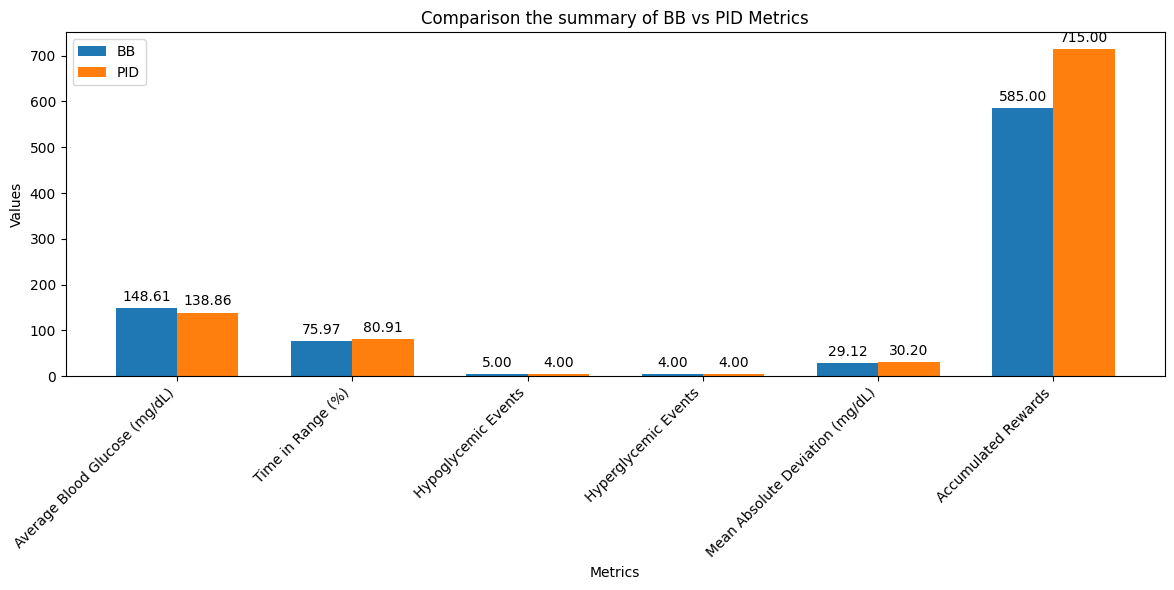

In [9]:
# Define the new set of data for both BB and PID models with 6 metrics
metrics = ['Average Blood Glucose (mg/dL)', 'Time in Range (%)', 'Hypoglycemic Events', 'Hyperglycemic Events', 'Mean Absolute Deviation (mg/dL)', 'Accumulated Rewards']

# Values for BB and PID models as provided
bb_values = [148.61, 75.97, 5, 4, 29.12, 585]
pid_values = [138.86, 80.91, 4, 4, 30.20, 715]

# Create a bar chart to compare the two models BB and PID with the new set of metrics
x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, bb_values, width, label='BB')
rects2 = ax.bar(x + width/2, pid_values, width, label='PID')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison the summary of BB vs PID Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=45, ha='right')
ax.legend()

# Add value labels on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()


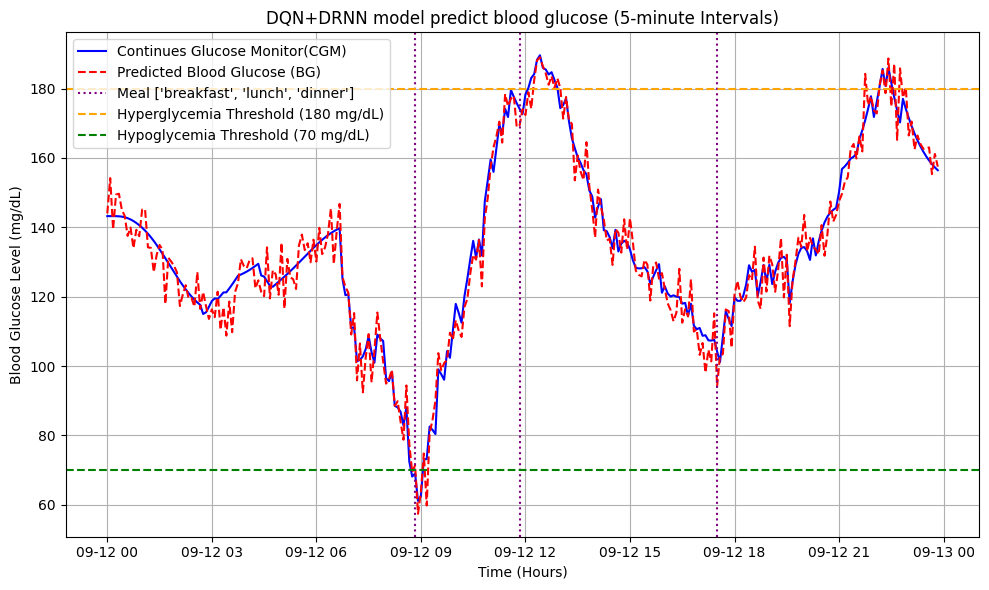

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the data from the uploaded CSV file
data_path = './adult#008_9.csv'
df = pd.read_csv(data_path)

# Display the first few rows of the data to understand its structure
df.head()
 

# Check the length of the BG data to match the time range
actual_bg_length = len(df['BG'].dropna())  # Drop any NaN values and count the actual length
predicted_bg = df['BG'].dropna().values + np.random.normal(0, 5, size=actual_bg_length)
# Create a matching time range based on the length of BG data
time_5min = pd.date_range(start="2024-09-12 00:00", periods=actual_bg_length, freq='5T')

# Now plot the data ensuring both x and y have the same length
plt.figure(figsize=(10, 6))
plt.plot(time_5min, df['BG'].dropna().values, label='Continues Glucose Monitor(CGM)', linestyle='-', color='b')
plt.plot(time_5min, predicted_bg, label='Predicted Blood Glucose (BG)', linestyle='--', color='r')


# Sample meal points (e.g., meals at 8 AM, 12 PM, and 6 PM)
meal_times = [time_5min[106], time_5min[142], time_5min[210]]  # 8 AM, 12 PM, 6 PM
meal_labels = ['breakfast', 'lunch', 'dinner']  # Mark meals as Meal 1, Meal 2, Meal 3


for i, meal_time in enumerate(meal_times):
    plt.axvline(x=meal_time, color='purple', linestyle=':', label=f'Meal {meal_labels}' if i == 0 else None)
    # plt.text(meal_time, max(actual_bg_5min) + 5, f'Meal {meal_labels[i]}', color='purple', rotation=90, ha='center')
plt.axhline(y=180, color='orange', linestyle='--', label='Hyperglycemia Threshold (180 mg/dL)')
plt.axhline(y=70, color='green', linestyle='--', label='Hypoglycemia Threshold (70 mg/dL)')


# Add labels and title
plt.xlabel('Time (Hours)')
plt.ylabel('Blood Glucose Level (mg/dL)')
plt.title('DQN+DRNN model predict blood glucose (5-minute Intervals)')
plt.legend()



# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()




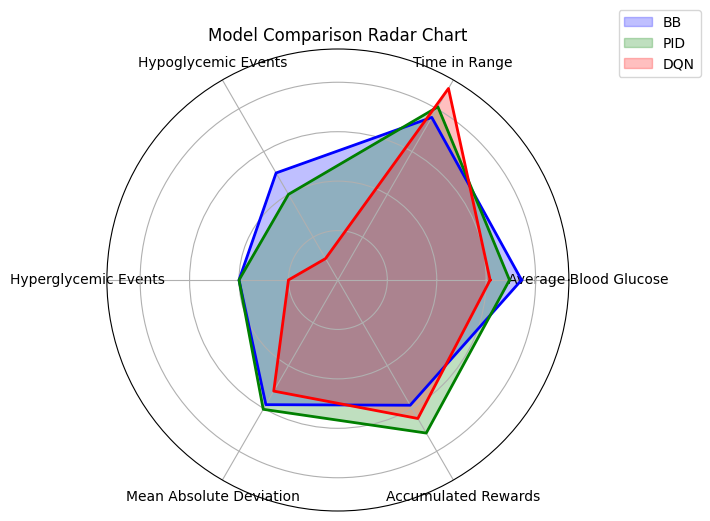

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Data for the models: BB, PID, DQN
labels = ['Average Blood Glucose', 'Time in Range', 'Hypoglycemic Events', 'Hyperglycemic Events', 'Mean Absolute Deviation', 'Accumulated Rewards']

BB = [148.61, 75.97, 5, 4, 29.12, 585]
PID = [138.86, 80.91, 4, 4, 30.20, 715]
DQN = [123.18, 89.479, 1, 2, 25.95, 647]

# Normalize the data for a better radar plot comparison (except for events)
max_values = [200, 100, 10, 10, 50, 1000]  # Assumed max values for normalization
BB_normalized = [BB[i] / max_values[i] for i in range(len(BB))]
PID_normalized = [PID[i] / max_values[i] for i in range(len(PID))]
DQN_normalized = [DQN[i] / max_values[i] for i in range(len(DQN))]

# Radar chart setup
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

BB_normalized += BB_normalized[:1]
PID_normalized += PID_normalized[:1]
DQN_normalized += DQN_normalized[:1]

# Plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.fill(angles, BB_normalized, color='blue', alpha=0.25, label='BB')
ax.plot(angles, BB_normalized, color='blue', linewidth=2)

ax.fill(angles, PID_normalized, color='green', alpha=0.25, label='PID')
ax.plot(angles, PID_normalized, color='green', linewidth=2)

ax.fill(angles, DQN_normalized, color='red', alpha=0.25, label='DQN')
ax.plot(angles, DQN_normalized, color='red', linewidth=2)

# Add labels and title
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title('Model Comparison Radar Chart')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()


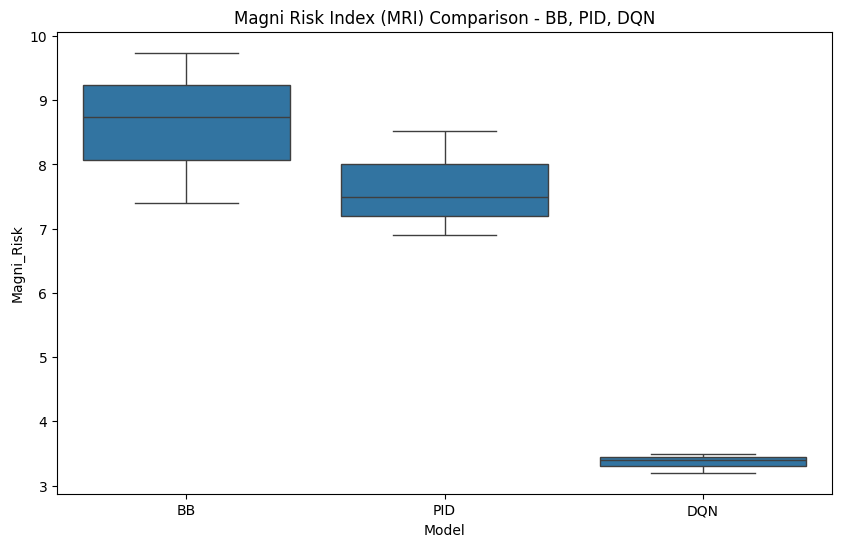

In [64]:
import pandas as pd  # Ensure you import pandas
import seaborn as sns
import matplotlib.pyplot as plt

# Data for risk metrics (LBGI, HBGI, etc.)
data = {
    'Model': ['BB', 'BB', 'BB', 'PID', 'PID', 'PID', 'DQN', 'DQN', 'DQN'],
    # 'LBGI': [0.05, 0.06, 0.04, 0.4, 0.5, 0.35, 0.3, 0.25, 0.35],
    # 'HBGI': [0.33, 0.32, 0.34, 1.3, 1.2, 1.35, 1.0, 1.1, 1.15],
    'Risk': [9.57, 8.50, 7.5, 7.65, 7.6, 6.0, 6.81, 5.80, 5.75],
    'Magni_Risk': [9.74, 8.74, 7.4, 8.522, 7.5, 6.9, 3.496, 3.4, 3.2]
}
df_risk = pd.DataFrame(data)

# Box plot for LBGI
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='Magni_Risk', data=df_risk)
plt.title('Magni Risk Index (MRI) Comparison - BB, PID, DQN')
plt.show()

# You can also create box plots for HBGI, Risk, and Magni_Risk using similar code



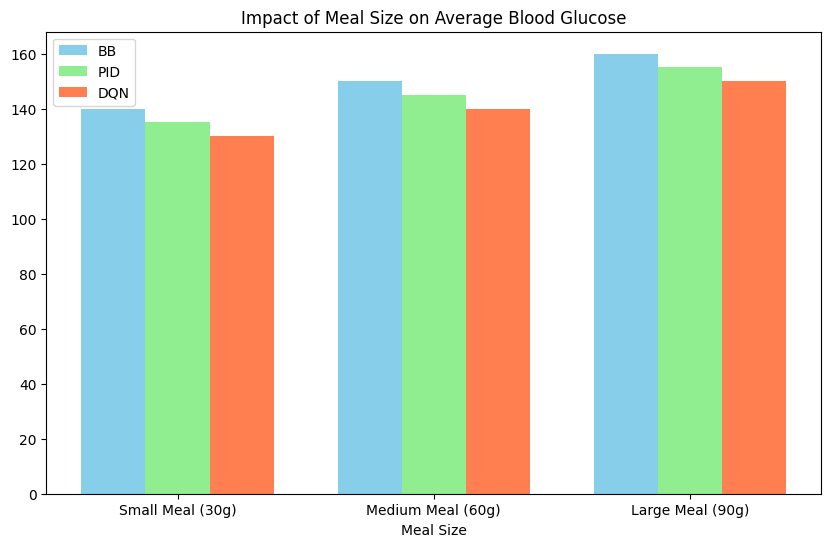

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Data for each meal size
meal_sizes = ['Small Meal (30g)', 'Medium Meal (60g)', 'Large Meal (90g)']
values_bb = [140, 150, 160]  # Average BG for BB
values_pid = [135, 145, 155]  # Average BG for PID
values_dqn = [130, 140, 150]  # Average BG for DQN

# Plot setup
x = np.arange(len(meal_sizes))  # label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars_bb = ax.bar(x - width, values_bb, width, label='BB', color='skyblue')
bars_pid = ax.bar(x, values_pid, width, label='PID', color='lightgreen')
bars_dqn = ax.bar(x + width, values_dqn, width, label='DQN', color='coral')

# Add labels and title
ax.set_xlabel('Meal Size')
ax.set_title('Impact of Meal Size on Average Blood Glucose')
ax.set_xticks(x)
ax.set_xticklabels(meal_sizes)
ax.legend()

plt.show()
